In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingRegressor,BaggingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_boston

import pickle

## Evaluating Models

### Evaluating Classification Models
* Confusion Matrix
* Precision, Recall and F1 score
* RoC curves and AUC


#### Positive class in binary classification
* One class considered positive
* other considered with reference to this one

### Confusion Matrix
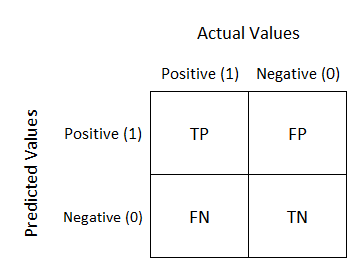

## Accuracy = (TP + TN)/(TP + TN + FP + FN) 
Total proportion of correct predictions

### Precision = TP/(TP + FP)
How many examples predicted as positives are actually positive?


### Recall = TP/(TP + FN)
How many positive examples are actually predicted as positive?


### F1-score = 2 x (Precision x Recall)/(Precision + Recall)
Harmonic mean of Precision and Recall

Maximizing this score results in a balancing of precision and recall 


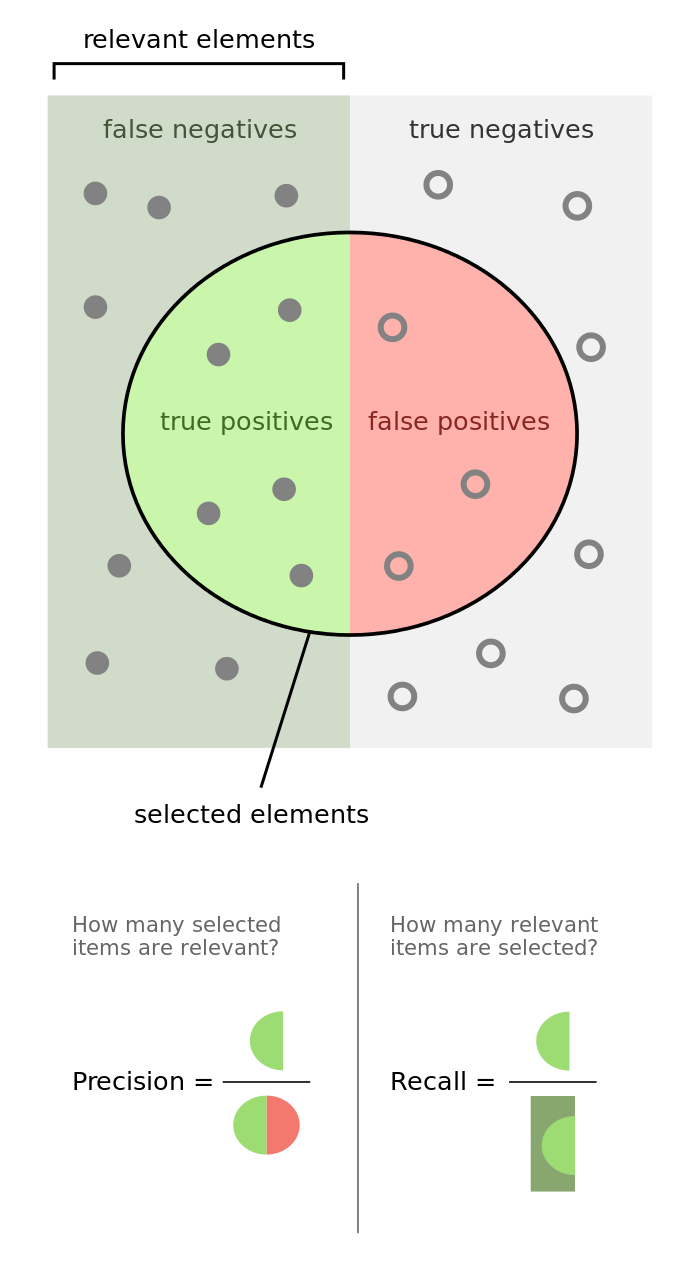

Precision = TP/(TP + FP)

Recall = TP/(TP + FN)

**Cancer Detection:**

Total Test Set = 100 (Cancer = 10, Benign = 90)

Model output: TP = 8, FP = 5

Precision = 8/(8+5) = 0.61

Recall = 8/(8+2) = 0.8

Accuracy = (8 + 85 ) /100 = 0.9


#### What is more important : Increase precision, recall, accuracy?

**Spam Filtering:**

Total Test Set = 100 (Spam = 10, Normal = 90)

Model output: TP = 8, FP = 5

Precision = 8/(8+5) = 0.61

Recall = 8/(8+2) = 0.8

Accuracy = (8 + 85 ) /100 = 0.9

#### What is most important : Increase precision, recall, accuracy?

We want to have a high recall say 90%: Our precision may suffer as a result.

Precision and recall are also sensitive to imbalanced datasets. Therefore, we need to vary both and plot them against each other to better visualize


#### Precision-Recall Curves
A plot of Precision against Recall for all possible thresholds (by varying the threshold)

* Setting a requirement on recall like 90% is called setting an **Operating Point**
* Important for performance guarantees in business settings

### RoC Curve (Receiver Operating Characteristics)
* A plot of False Positive Rate (FPR) against True Positive Rate (TPR)
* TPR = Recall
* FPR = FP/(FP + TN)

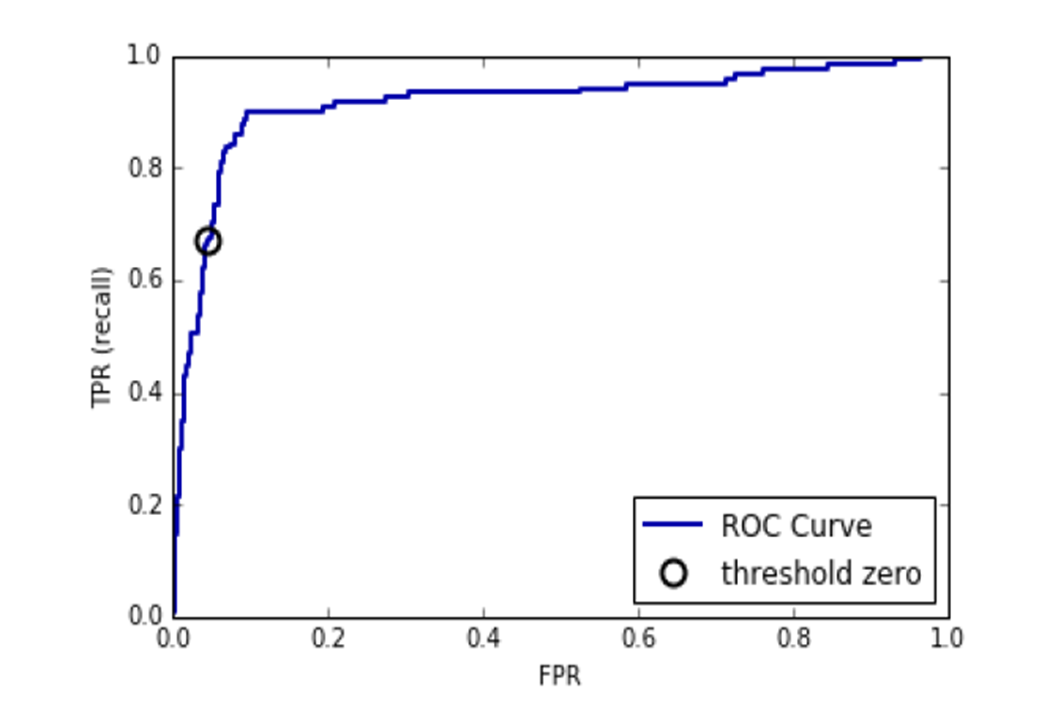

### RoC AuC Score: Area Under a Curve of the RoC
* Gives us a single number to estimate model performance
* Better for imbalanced sets
* Random model always gives 0.5 AUC
* AUC of between 0 and 1 where 1 is the best model
* It’s a measure of average precision


### Multi-class Classification
* Compute F-1 score for one binary class while considering everything else as other
* Average out per class scores

F1 score function takes the following methods as argument
  * Macro: Compute the average un-weighted F1-scores for all classes
  * Weighted: Compute average F-1 score but assign weights to each class according to a weighting scheme
  * Micro: fine grained calculations. Report total FP, FN, TP, precision, recall and F-1 scores for each class and average them out

Scikit-learn has a classification_report function that prints different measurements
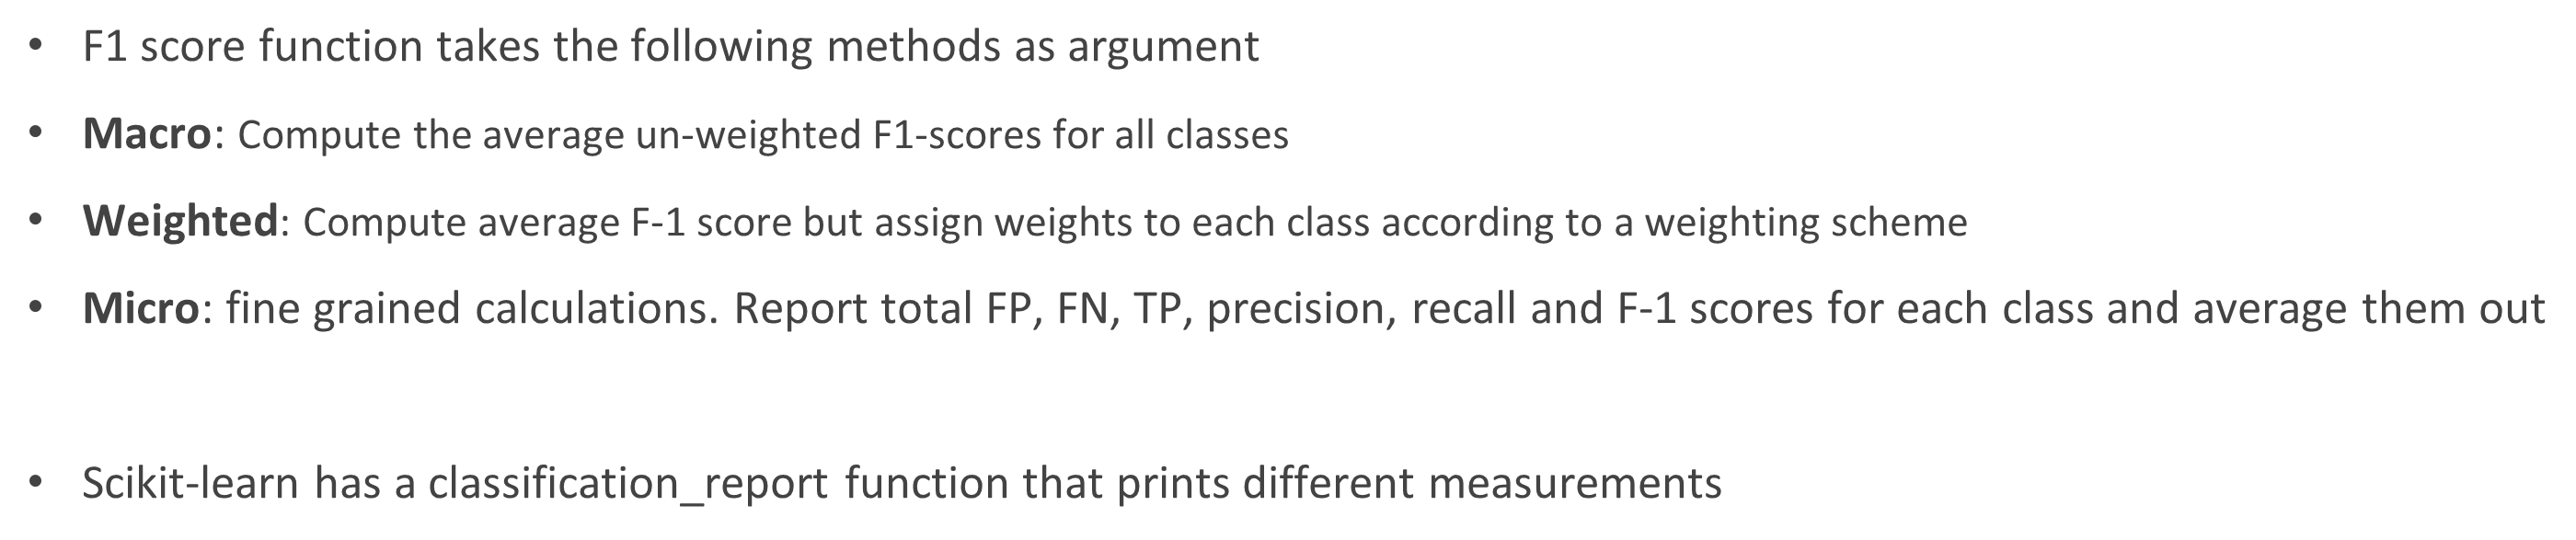

In [ ]:
cancer_data = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target,stratify = cancer_data.target,
    shuffle = True,random_state=144)

In [ ]:
def get_classification_results(model,X_train,y_train,X_test,y_test,target_names=None):
    model = model.fit(X_train, y_train)
    print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(model.score(X_test, y_test)))
    preds = model.predict(X_test)
    confusion = confusion_matrix(y_test, preds)
    print("Confusion matrix:\n{}".format(confusion))
    print('F1 score = {:.3f}'.format(f1_score(y_test, preds)))
    print('ROC-AUC Score = {:.3f}'.format(roc_auc_score(y_test,preds)))
    if target_names is not None:
        print(classification_report(y_test, preds,target_names=target_names))
    

In [ ]:
logreg = LogisticRegression()
get_classification_results(logreg,X_train,y_train,X_test,y_test,target_names=["malignant", "benign"])

In [ ]:
dt = DecisionTreeClassifier()
get_classification_results(dt,X_train,y_train,X_test,y_test,target_names=["malignant", "benign"])

In [ ]:
rf = RandomForestClassifier(n_estimators=100,oob_score=True,random_state=100)
get_classification_results(rf,X_train,y_train,X_test,y_test,target_names=["malignant", "benign"])

In [ ]:
gb = GradientBoostingClassifier(random_state=100)
get_classification_results(gb,X_train,y_train,X_test,y_test,target_names=["malignant", "benign"])

In [ ]:
# apply Bagging Classifier with Decision Tree


In [ ]:
svm_model = svm.LinearSVC(C=100.0)
get_classification_results(svm_model,X_train,y_train,X_test,y_test,target_names=["malignant", "benign"])

In [ ]:
# scale the training and test sets using standard scaler and repeat with SVC

## Evaluatring Regression Models
### R-2 (R-Squared) Error for Regression Problems
It is the fraction of the total variation in y that is captured by a model. Or, how well does a line follow the variations within the dataset
* is a number between 0 and 1
* 1 means perfect
* 0 means we learned nothing
* 0.5 means we didn’t do better than random guessing
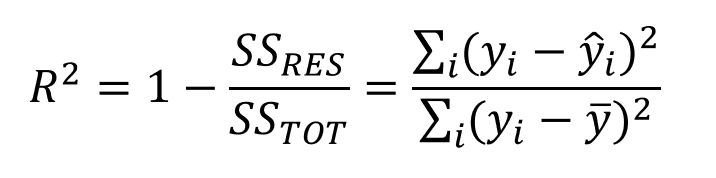

In [ ]:
def r2_score(preds,actuals):
    numerator = np.sum(np.square((actuals - preds)))
    denominator = np.sum(np.square(actuals - np.mean(actuals)))
    return 1.0 - np.float(numerator/denominator)

In [ ]:
r2_score(np.array([1.4,3.5,2.3,11.4]),np.array([1.3,3.5,2.0,11.8]))

In [ ]:
boston = load_boston()
X = boston.data
boston_df = pd.DataFrame(X,columns=boston.feature_names)
y = boston.target
boston_df.head()

In [ ]:
print(boston.DESCR)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=100)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [ ]:
def get_regression_scores(X_train,X_test,y_train,y_test):
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    print("LR Training set score: {:.2f}".format(lr.score(X_train,y_train)))
    print("LR test set score: {:.2f}".format(lr.score(X_test, y_test)))
    ls = Lasso()
    ls.fit(X_train,y_train)
    print("Lasso Training set score: {:.2f}".format(ls.score(X_train,y_train)))
    print("Lasso test set score: {:.2f}".format(ls.score(X_test, y_test)))
    rg = Ridge()
    rg.fit(X_train,y_train)
    print("Ridge Training set score: {:.2f}".format(rg.score(X_train,y_train)))
    print("Ridge test set score: {:.2f}".format(rg.score(X_test, y_test)))
    es = ElasticNet()
    es.fit(X_train,y_train)
    print("ElasticNet Training set score: {:.2f}".format(es.score(X_train,y_train)))
    print("ElasticNet test set score: {:.2f}".format(es.score(X_test, y_test)))
    

In [ ]:
get_regression_scores(X_train,X_test,y_train,y_test)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=100)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [ ]:
get_regression_scores(X_train,X_test,y_train,y_test)